In [243]:
import numpy as np 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
import sklearn.datasets
from sklearn.metrics import confusion_matrix

In [244]:
#read data file
data_read = pd.read_csv('wdbc.csv', delimiter = ',', names = ['ID'
                                                            , 'diagnosis'
                                                            , 'radius_mean'
                                                            , 'texture_mean'
                                                            , 'perimeter_mean'
                                                            , 'area_mean'
                                                            , 'smoothness_mean'
                                                            , 'compactness_mean'
                                                            , 'concavity_mean'
                                                            , 'concave_points_mean'
                                                            , 'symmetry_mean'
                                                            , 'fractal_dimension_mean'
                                                            , 'radius_SE'
                                                            , 'texture_SE'
                                                            , 'perimeter_SE'
                                                            , 'area_SE'
                                                            , 'smoothness_SE'
                                                            , 'compactness_SE'
                                                            , 'concavity_SE'
                                                            , 'concave_points_SE'
                                                            , 'symmetry_SE'
                                                            , 'fractal_dimension_SE'
                                                            , 'radius_worstORlargest'
                                                            , 'texture_worstORlargest'
                                                            , 'perimeter_worstORlargest'
                                                            , 'area_worstORlargest'
                                                            , 'smoothness_worstORlargest'
                                                            , 'compactness_worstORlargest'
                                                            , 'concavity_worstORlargest'
                                                            , 'concave_points_worstORlargest'
                                                            , 'symmetry_worstORlargest'
                                                            , 'fractal_dimension_worstORlargest'
                                                            ])
print(data_read.shape)

(569, 32)


In [245]:
#drop column ID
data_read = data_read.drop(['ID'],axis = 1)
print(data_read.shape)

(569, 31)


In [246]:
#mapping label diagnosis to 0 and 1
data_read['diagnosis'] = data_read['diagnosis'].map({'B':0, 'M':1})

In [247]:
#allocating x values --> all columns except diagnosis
x=data_read.iloc[:,1:]
print(x.shape)

(569, 30)


In [248]:
#allocating y values --> diagnosis column
y = data_read['diagnosis'].values
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(569,)
(569, 1)


In [249]:
#normalizing the data
x = (x - np.min(x))/(np.max(x) - np.min(x)).values
print(x.shape)

(569, 30)


In [250]:
#splitting data into train-test --> 80%-20%
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0) 

In [251]:
#splitting test data into validation-test --> 50%-50%
x_test, x_val, y_test, y_val = train_test_split( x_test, y_test, test_size = 0.5, random_state = 0)

In [252]:
print("After splitting into train-val-test")
print("x train : ", x_train.shape) 
print("x val   : ", x_val.shape) 
print("x test  : ", x_test.shape) 
print("y train : ", y_train.shape)
print("y val   : ", y_val.shape) 
print("y test  : ", y_test.shape)

After splitting into train-val-test
x train :  (455, 30)
x val   :  (57, 30)
x test  :  (57, 30)
y train :  (455, 1)
y val   :  (57, 1)
y test  :  (57, 1)


In [253]:
#getting transpose of all datasets
x_train = x_train.T 
x_val = x_val.T
x_test = x_test.T 
y_train = y_train.T 
y_val = y_val.T
y_test = y_test.T

In [254]:
print("New shapes post transpose: After splitting into train-val-test")
print("x train : ", x_train.shape) 
print("x val   : ", x_val.shape) 
print("x test  : ", x_test.shape) 
print("y train : ", y_train.shape)
print("y val   : ", y_val.shape) 
print("y test  : ", y_test.shape)

New shapes post transpose: After splitting into train-val-test
x train :  (30, 455)
x val   :  (30, 57)
x test  :  (30, 57)
y train :  (1, 455)
y val   :  (1, 57)
y test  :  (1, 57)


In [255]:
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [256]:
m = x_train.shape[1]
print(m)

455


In [257]:
#initializing weights
w1 = np.full((x_train.shape[0], 1), 0.01)
print(w1.shape)
w2 = np.full((x_train.shape[0], 1), 0.01)
print(w2.shape)

(30, 1)
(30, 1)


In [258]:
#initializing bias
b = 0

In [259]:
#predicting y values for train/test/val datasets
def predict(w, b, X_data):
    X = X_data
    Y_predicted_value = np.zeros((1,X.shape[1]))
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_predicted_value[0, i] = 0 if A[0, i] <= 0.5 else 1
    return Y_predicted_value

In [260]:
#using confusion matrix, computing the accuracy, precision and recall
def APR_calc(data, prediction_data):
    conf_matrix = confusion_matrix(data.T, prediction_data.T)
    TP = conf_matrix[0][0]
    FN = conf_matrix[0][1]
    FP = conf_matrix[1][0]
    TN = conf_matrix[1][1]
    accuracy = ((TP + TN)/(TP + TN + FN + FP)) * 100
    print('accuracy is {}%'.format(accuracy))
    precision = ((TP)/(TP + FP) ) * 100
    print('precision is {}%'.format(precision))
    recall = ((TP)/(TP + FN)) * 100
    print('recall is {}%'.format(recall))

In [261]:
losstrack = []

In [262]:
losstrack1 = []
losstrack2 = []
b1=0
b2=0

In [263]:
def plot_cost_function(cost1,cost2):
    plt.plot(cost1,label="training_loss")
    plt.plot(cost2,label="validation_loss")
    plt.xlabel('Iterations',fontweight="bold",fontsize = 12)
    plt.ylabel('Loss',fontweight="bold",fontsize = 12)
    plt.title("Cost Function",fontweight="bold",fontsize = 16)
    plt.legend()
    plt.show()

In [264]:
label = " "

In [265]:
def accuracyplot(train_accuracy, val_accuracy, label):
    plt.plot(train_accuracy, label= 'training_accuracy')
    plt.plot(val_accuracy, label= 'validation_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training data accuracy vs Validation data accuracy')
    plt.legend()
    plt.show()

In [266]:
losstrack = []
valLoss = []
trainAccuracy = []
valAccuracy = []

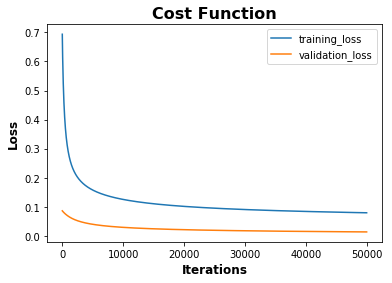

In [267]:
#applying the sigmoid function, cost function and obtaining updated weights and bias 
#and plotting graph for epochs vs train/val data
epochs=50000
x_values1=x_train
y_values1=y_train
x_values2=x_val
y_values2=y_val
learningRate=0.05
accuracy_graph = []
for epoch in range(epochs):
    z1 = np.dot(w1.T, x_values1) + b1
    p1 = sigmoid(z1)
    cost1 = -np.sum(np.multiply(np.log(p1), y_values1) + np.multiply((1 - y_values1), np.log(1 - p1)))/m
    losstrack1.append(np.squeeze(cost1))
    dz1 = p1 - y_values1
    #updating wts and bias
    dw1 = (1/m) * np.dot(x_values1, dz1.T)
    db1 = (1/m) * np.sum(dz1)
    w1 = w1 - learningRate * dw1
    b1 = b1 - learningRate * db1
    
    z2 = np.dot(w2.T, x_values2) + b2
    p2 = sigmoid(z2)
    cost2 = -np.sum(np.multiply(np.log(p2), y_values2) + np.multiply((1 - y_values2), np.log(1 - p2)))/m
    losstrack2.append(np.squeeze(cost2))
    dz2 = p2 - y_values2
    #updating wts and bias
    dw2 = (1/m) * np.dot(x_values2, dz2.T)
    db2 = (1/m) * np.sum(dz2)
    w2 = w2 - learningRate * dw2
    b2 = b2 - learningRate * db2

plot_cost_function(losstrack1,losstrack2 )

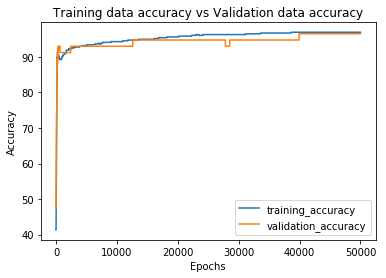

In [268]:
#training the weights and bias for training_data and validation datasets to compute their accuracy
for epoch in range(epochs):
    z = np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1 - y_train),np.log(1 - p)))/m
    losstrack.append(np.squeeze(cost))
    
    dz = p - y_train
    dw = (1/m) * np.dot(x_train, dz.T)
    db = (1/m) * np.sum(dz)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    z1 = np.dot(w.T, x_val) + b
    p1 = sigmoid(z1)
    validation_cost = -np.sum(np.multiply(np.log(p1), y_val) + np.multiply((1 - y_val),np.log(1 - p1)))/m
    valLoss.append(np.squeeze(validation_cost))
    
    Y_prediction_train = predict(w, b, x_train)
    Y_prediction_train = Y_prediction_train.astype(int)[0]
    
    Y_prediction_val = predict(w, b, x_val)
    Y_prediction_val = Y_prediction_val.astype(int)[0]
    
    train_accuracy = ((100 - np.mean(np.abs(Y_prediction_train -  y_train[0])) * 100))
    val_accuracy = ((100 - np.mean(np.abs(Y_prediction_val -  y_val[0])) * 100))
    
    trainAccuracy.append(train_accuracy)
    valAccuracy.append(val_accuracy)

accuracyplot(trainAccuracy, valAccuracy, learning_rate)

In [269]:
#predicting y values for test dataset
Y_prediction_test = predict(w, b, x_test)

In [270]:
APR_calc(y_test, Y_prediction_test)

accuracy is 96.49122807017544%
precision is 94.5945945945946%
recall is 100.0%


In [271]:
#predicting y values for validation dataset
Y_prediction_validation = predict(w, b, x_val)

In [272]:
APR_calc(y_val, Y_prediction_validation)

accuracy is 96.49122807017544%
precision is 96.875%
recall is 96.875%


In [273]:
#predicting y values for training dataset
Y_prediction_train = predict(w, b, x_train)

In [274]:
APR_calc(y_train, Y_prediction_train)

accuracy is 96.92307692307692%
precision is 96.30872483221476%
recall is 98.9655172413793%
